<a href="https://colab.research.google.com/github/Ad7amstein/Disease-Prediction/blob/main/Disease_Prediction_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Modeling for Disease Diagnosis

**Author**: Adham Allam<br>
<a href="https://www.linkedin.com/in/adham-allam/">LinkedIn<a> <a href="https://www.kaggle.com/adham3lam">Kaggle<a>


# Outline:
- [Objective](#goal)
- [Tools](#tools)
- [Exploratory Data Analysis (EDA)](#eda)
  - [Data Loading](#load)
  - [Data Summary](#summary)
  - [Descriptive Statistics](#stat)
  - [Target Variable Analysis](#tar_analysis)
  - [Feature Correlation](#fet_corr)
- [Oversampling using **SMOTE**](#smote)
- [Spliting the data](#split)
- [Models](#models)
  - [Losigtic Regression](#lr)
  - [Decision Tree](#dr)
  - [Random Forest](#rf)

## <a name="goal">Objective<a>
The objective of this project is to develop a predictive model that can accurately classify individuals into
diseased or non-diseased categories based on their health attributes. By leveraging machine learning
algorithms, we aim to create a reliable tool that healthcare providers can use to assist in disease
diagnosis and prognosis.

## <a name="tools">Tools<a>
In this project, we will make use of:
- pandas, a Python library used for working with data sets
- seaborn, a Python data visualization library based on matplotlib
- Matplotlib, a popular library for plotting data
- sklearn, a simple and efficient tools for predictive data analysis

In [105]:
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## <a name="eda">Exploratory Data Analysis (EDA)<a>

### <a name="load">Data Loading<a>

In [106]:
# URL's for which the data is stored
url_train_data = "https://raw.githubusercontent.com/Ad7amstein/Disease-Prediction/main/Data/train_data.csv"
url_test_data = "https://raw.githubusercontent.com/Ad7amstein/Disease-Prediction/main/Data/test_data.csv"

# Read the data as CSV files
train_data = read_csv(url_train_data)
test_data = read_csv(url_test_data)

### <a name="summary">Data Summary<a>

In [107]:
# Check the dimensions of the dataset
print(f"The shape of the train data: {train_data.shape}")
print(f"The shape of the test data: {test_data.shape}")

The shape of the train data: (2351, 25)
The shape of the test data: (486, 25)


In [108]:
# Display the first few rows
train_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [109]:
# Check some information about the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [110]:
# Check for missing values
train_data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

<Axes: >

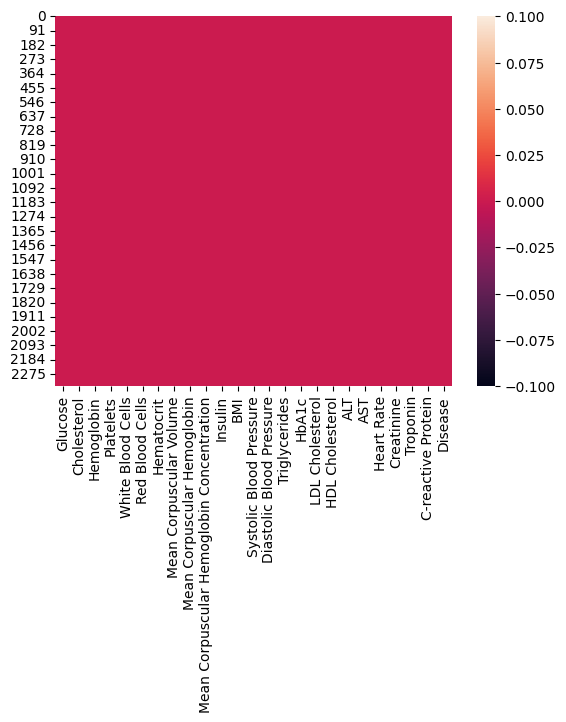

In [111]:
# let's see the distribution of the null values
sns.heatmap(train_data.isnull())

### <a name="stat">Descriptive Statistics<a>

In [112]:
# Compute summary statistics for numerical features
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,2351.0,0.362828,0.251889,0.010994,0.129198,0.351722,0.582278,0.968460
Cholesterol,2351.0,0.393648,0.239449,0.012139,0.195818,0.397083,0.582178,0.905026
Hemoglobin,2351.0,0.586190,0.271498,0.003021,0.346092,0.609836,0.791215,0.983306
Platelets,2351.0,0.504027,0.303347,0.012594,0.200865,0.533962,0.754841,0.999393
White Blood Cells,2351.0,0.511086,0.277270,0.010139,0.259467,0.527381,0.743164,0.990786
Red Blood Cells,2351.0,0.506590,0.266565,0.044565,0.263589,0.467431,0.743670,1.000000
Hematocrit,2351.0,0.507152,0.285537,0.011772,0.288132,0.493428,0.753657,0.977520
Mean Corpuscular Volume,2351.0,0.492200,0.275735,0.046942,0.287532,0.453052,0.722293,0.995263
Mean Corpuscular Hemoglobin,2351.0,0.484459,0.315618,0.000554,0.207938,0.420723,0.778160,0.963235
Mean Corpuscular Hemoglobin Concentration,2351.0,0.562273,0.273281,0.006947,0.355774,0.603635,0.741381,0.975586


In [113]:
# For categorical features, count the frequency of each category
train_data["Disease"].value_counts()

Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64

<Axes: xlabel='Disease'>

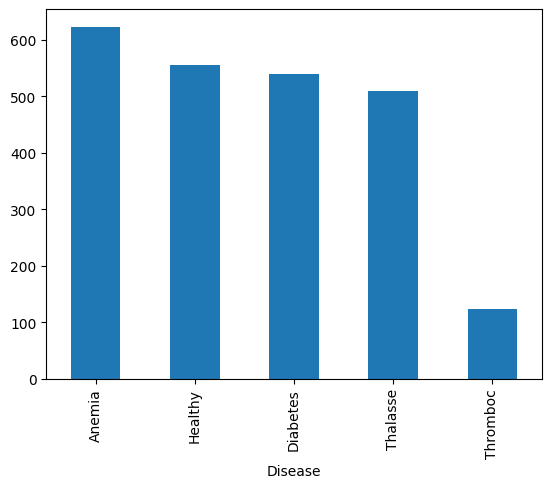

In [114]:
# Visualize distributions of categorical features using bar plots.
train_data["Disease"].value_counts().plot(kind="bar")

### <a name="tar_analysis">Target Variable Analysis<a>

<Axes: xlabel='Disease'>

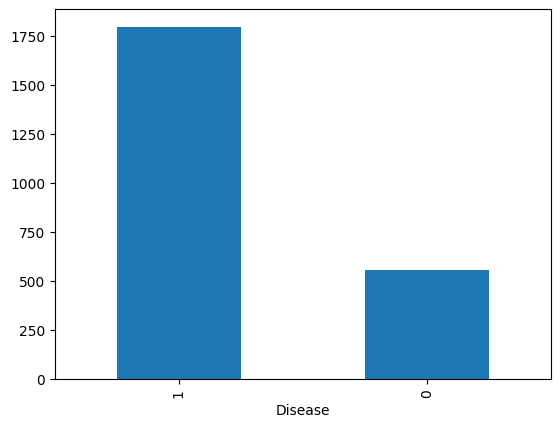

In [115]:
# Convert target to numerical values
train_data.Disease = [0 if value == "Healthy" else 1 for value in train_data.Disease]
# Visualize distributions of categorical features using bar plots.
train_data["Disease"].value_counts().plot(kind="bar")

In [116]:
# For categorical features, count the frequency of each category
train_data["Disease"].value_counts()

Disease
1    1795
0     556
Name: count, dtype: int64

### <a name="fet_corr">Feature Correlation<a>

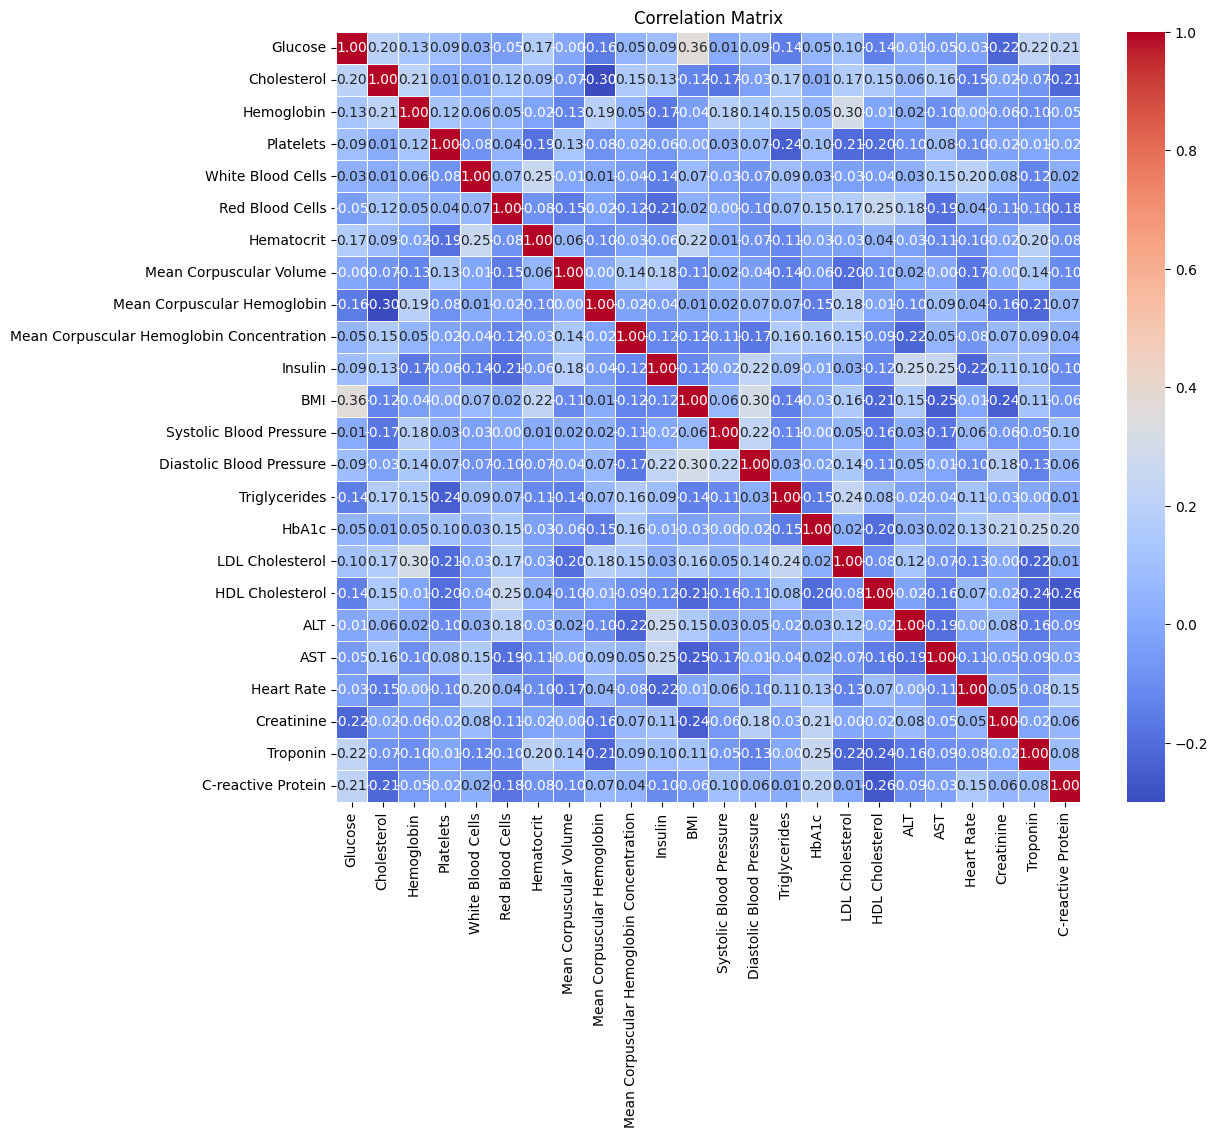

In [117]:
# Drop the categorical target
numerical_data = train_data.drop('Disease', axis=1)

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

In [118]:
# Check for high correlations
features = numerical_data.columns
for feature1 in features:
  for feature2 in features:
    if feature1 != feature2:
      corr = correlation_matrix.loc[feature1, feature2]
      if corr > 0.4 or corr < -0.4:
        print(f"Correlation coefficient between {feature1} and {feature2}: {corr}")

## <a name="smote">Oversampling using **SMOTE**<a>

In [119]:
# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_train_resampled, y_train_resampled = smote.fit_resample(numerical_data, train_data['Disease'])

In [120]:
X_train_resampled.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970


In [121]:
len(X_train_resampled)

3590

<Axes: xlabel='Disease'>

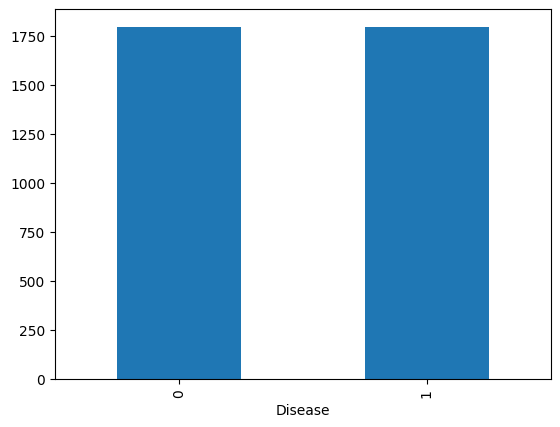

In [122]:
y_train_resampled.value_counts().plot(kind="bar")

## <a name="split">Spliting the data<a>

In [123]:
# Split the target from the features for the train data
X_train, y_train = train_data.drop('Disease', axis=1), train_data['Disease']

# Split the target from the features for the train data
test_data.Disease = [0 if value == 'Healthy' else 1 for value in test_data['Disease']]
X_test, y_test = test_data.drop('Disease', axis=1), test_data['Disease']

## <a name="models">Models<a>

### <a name="lr">Losigtic Regression<a>

In [132]:
# 1. Logistic Regression (Using resampled data)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_resampled, y_train_resampled)
lr_prediction1 = logistic_regression.predict(X_train_resampled)
lr_prediction2 = logistic_regression.predict(X_test)
print("Logistic Regression Accuracy (train):", accuracy_score(y_train_resampled, lr_prediction1))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_prediction2))
print(classification_report(y_test, lr_prediction2))

Logistic Regression Accuracy (train): 0.9866295264623955
Logistic Regression Accuracy: 0.668724279835391
              precision    recall  f1-score   support

           0       0.02      0.60      0.04         5
           1       0.99      0.67      0.80       481

    accuracy                           0.67       486
   macro avg       0.51      0.63      0.42       486
weighted avg       0.98      0.67      0.79       486



In [133]:
# 1. Logistic Regression (Using normal data)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
lr_prediction1 = logistic_regression.predict(X_train)
lr_prediction2 = logistic_regression.predict(X_test)
print("Logistic Regression Accuracy (train):", accuracy_score(y_train, lr_prediction1))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_prediction2))
print(classification_report(y_test, lr_prediction2))

Logistic Regression Accuracy (train): 0.9574649085495534
Logistic Regression Accuracy: 0.7283950617283951
              precision    recall  f1-score   support

           0       0.02      0.60      0.04         5
           1       0.99      0.73      0.84       481

    accuracy                           0.73       486
   macro avg       0.51      0.66      0.44       486
weighted avg       0.98      0.73      0.83       486



### <a name="dr">Decision Tree<a>

In [135]:
# 2. Decision Trees (Using resampled data)
dtree = DecisionTreeClassifier()
dtree.fit(X_train_resampled, y_train_resampled)
dtree_pred1 = dtree.predict(X_train_resampled)
print("Decision Tree Accuracy (train):", accuracy_score(y_train_resampled, dtree_pred1))
dtree_pred2 = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dtree_pred2))
print(classification_report(y_test, dtree_pred2))

Decision Tree Accuracy (train): 1.0
Decision Tree Accuracy: 0.8662551440329218
              precision    recall  f1-score   support

           0       0.07      1.00      0.13         5
           1       1.00      0.86      0.93       481

    accuracy                           0.87       486
   macro avg       0.54      0.93      0.53       486
weighted avg       0.99      0.87      0.92       486



In [136]:
# 2. Decision Trees (Using normal data)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred1 = dtree.predict(X_train)
print("Decision Tree Accuracy (train):", accuracy_score(y_train, dtree_pred1))
dtree_pred2 = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dtree_pred2))
print(classification_report(y_test, dtree_pred2))

Decision Tree Accuracy (train): 1.0
Decision Tree Accuracy: 0.7654320987654321
              precision    recall  f1-score   support

           0       0.03      0.60      0.05         5
           1       0.99      0.77      0.87       481

    accuracy                           0.77       486
   macro avg       0.51      0.68      0.46       486
weighted avg       0.98      0.77      0.86       486



### <a name="rf">Random Forest<a>

In [138]:
# 3. Random Forest (Using resampled data)
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
rf_pred1 = rf.predict(X_train_resampled)
print("Random Forest Accuracy (train):", accuracy_score(y_train_resampled, rf_pred1))
rf_pred2 = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred2))
print(classification_report(y_test, rf_pred2))

Random Forest Accuracy (train): 1.0
Random Forest Accuracy: 0.9670781893004116
              precision    recall  f1-score   support

           0       0.18      0.60      0.27         5
           1       1.00      0.97      0.98       481

    accuracy                           0.97       486
   macro avg       0.59      0.79      0.63       486
weighted avg       0.99      0.97      0.98       486



In [140]:
# 3. Random Forest (Using normal data)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred1 = rf.predict(X_train)
print("Random Forest Accuracy (train):", accuracy_score(y_train, rf_pred1))
rf_pred2 = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred2))
print(classification_report(y_test, rf_pred2))

Random Forest Accuracy (train): 1.0
Random Forest Accuracy: 0.9567901234567902
              precision    recall  f1-score   support

           0       0.06      0.20      0.09         5
           1       0.99      0.96      0.98       481

    accuracy                           0.96       486
   macro avg       0.52      0.58      0.53       486
weighted avg       0.98      0.96      0.97       486

